In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
uraninjo_augmented_alzheimer_mri_dataset_path = kagglehub.dataset_download('uraninjo/augmented-alzheimer-mri-dataset')

print('Data source import complete.')


100%|██████████| 380M/380M [00:19<00:00, 20.3MB/s]

Extracting files...


Data source import complete.


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [3]:
print(uraninjo_augmented_alzheimer_mri_dataset_path)

/root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1


In [4]:
!ls /root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1

AugmentedAlzheimerDataset  OriginalDataset


In [5]:
!ls /root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/OriginalDataset

MildDemented  ModerateDemented	NonDemented  VeryMildDemented


In [6]:
!ls /root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/AugmentedAlzheimerDataset

MildDemented  ModerateDemented	NonDemented  VeryMildDemented


In [7]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [8]:
import os
import pandas as pd

MildDemented_dir = r'/root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/AugmentedAlzheimerDataset/MildDemented'
ModerateDemented_dir = r'/root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/AugmentedAlzheimerDataset/ModerateDemented'
NonDemented_dir = r'/root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/AugmentedAlzheimerDataset/NonDemented'
VeryMildDemented_dir = r'/root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/AugmentedAlzheimerDataset/VeryMildDemented'

filepaths = []
labels = []
dict_list = [MildDemented_dir, ModerateDemented_dir, NonDemented_dir, VeryMildDemented_dir]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Alzheimer_data = pd.concat([Fseries, Lseries], axis=1)
Alzheimer_df = pd.DataFrame(Alzheimer_data)
print(Alzheimer_df.head())
print(Alzheimer_df["labels"].value_counts())

                                           filepaths         labels
0  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
1  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
2  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
3  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
4  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
labels
Non Demented         9600
Mild Demented        8960
Very MildDemented    8960
Moderate Demented    6464
Name: count, dtype: int64


In [9]:
Alzheimer_df.shape

(33984, 2)

In [10]:
train_images, test_images = train_test_split(Alzheimer_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(Alzheimer_df, test_size=0.2, random_state=42)

In [11]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(27187, 2)
(10196, 2)
(6797, 2)
(23788, 2)


In [12]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 27187 validated image filenames belonging to 4 classes.
Found 10196 validated image filenames belonging to 4 classes.
Found 6797 validated image filenames belonging to 4 classes.


In [13]:
classes=list(train.class_indices.keys())
print (classes)

['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']


In [14]:
def show_knee_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

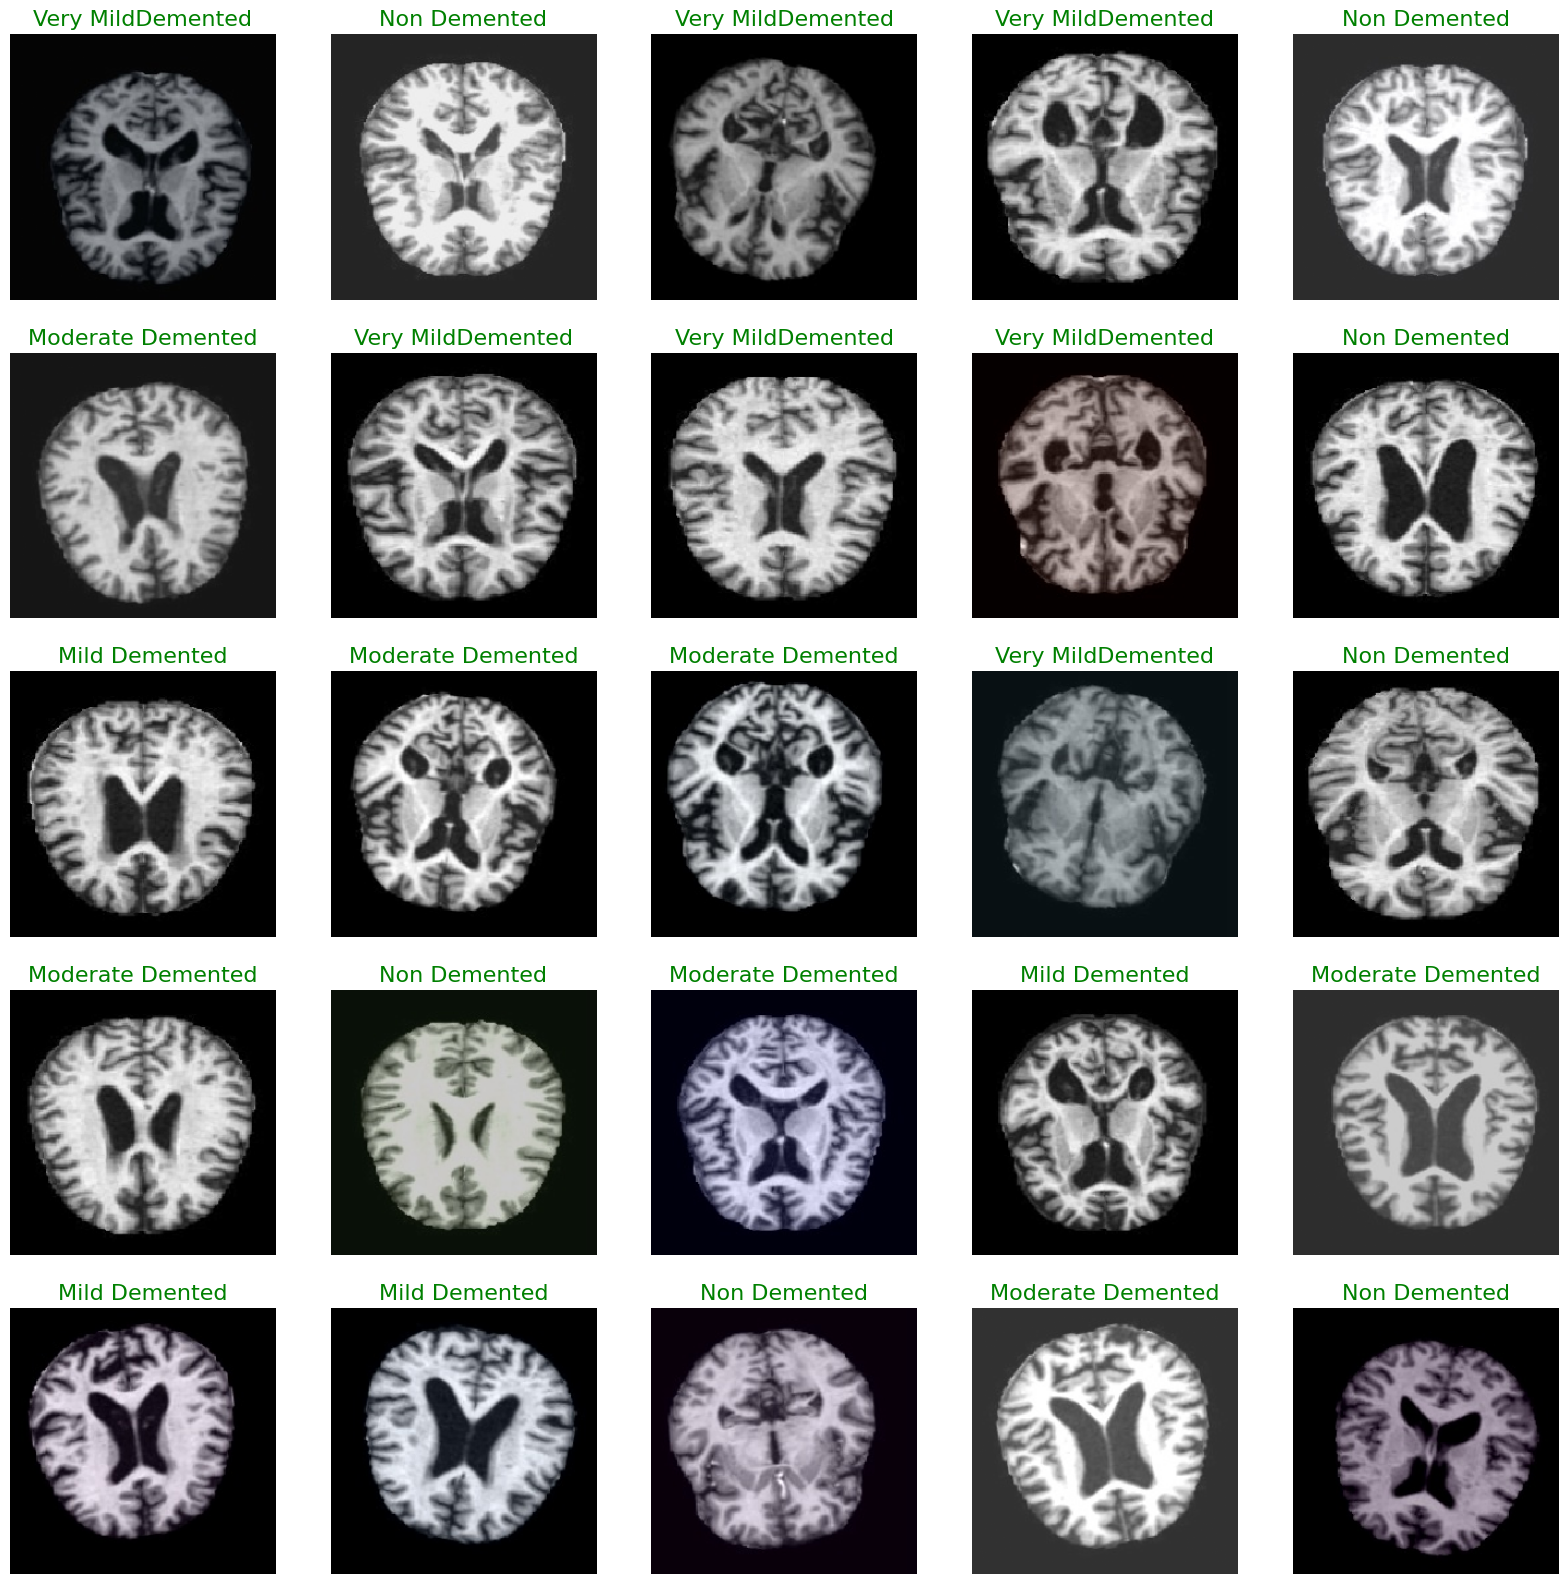

In [15]:
show_knee_images(train)

In [16]:
from tensorflow.keras.optimizers import Adamax

img_shape=(244,244,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

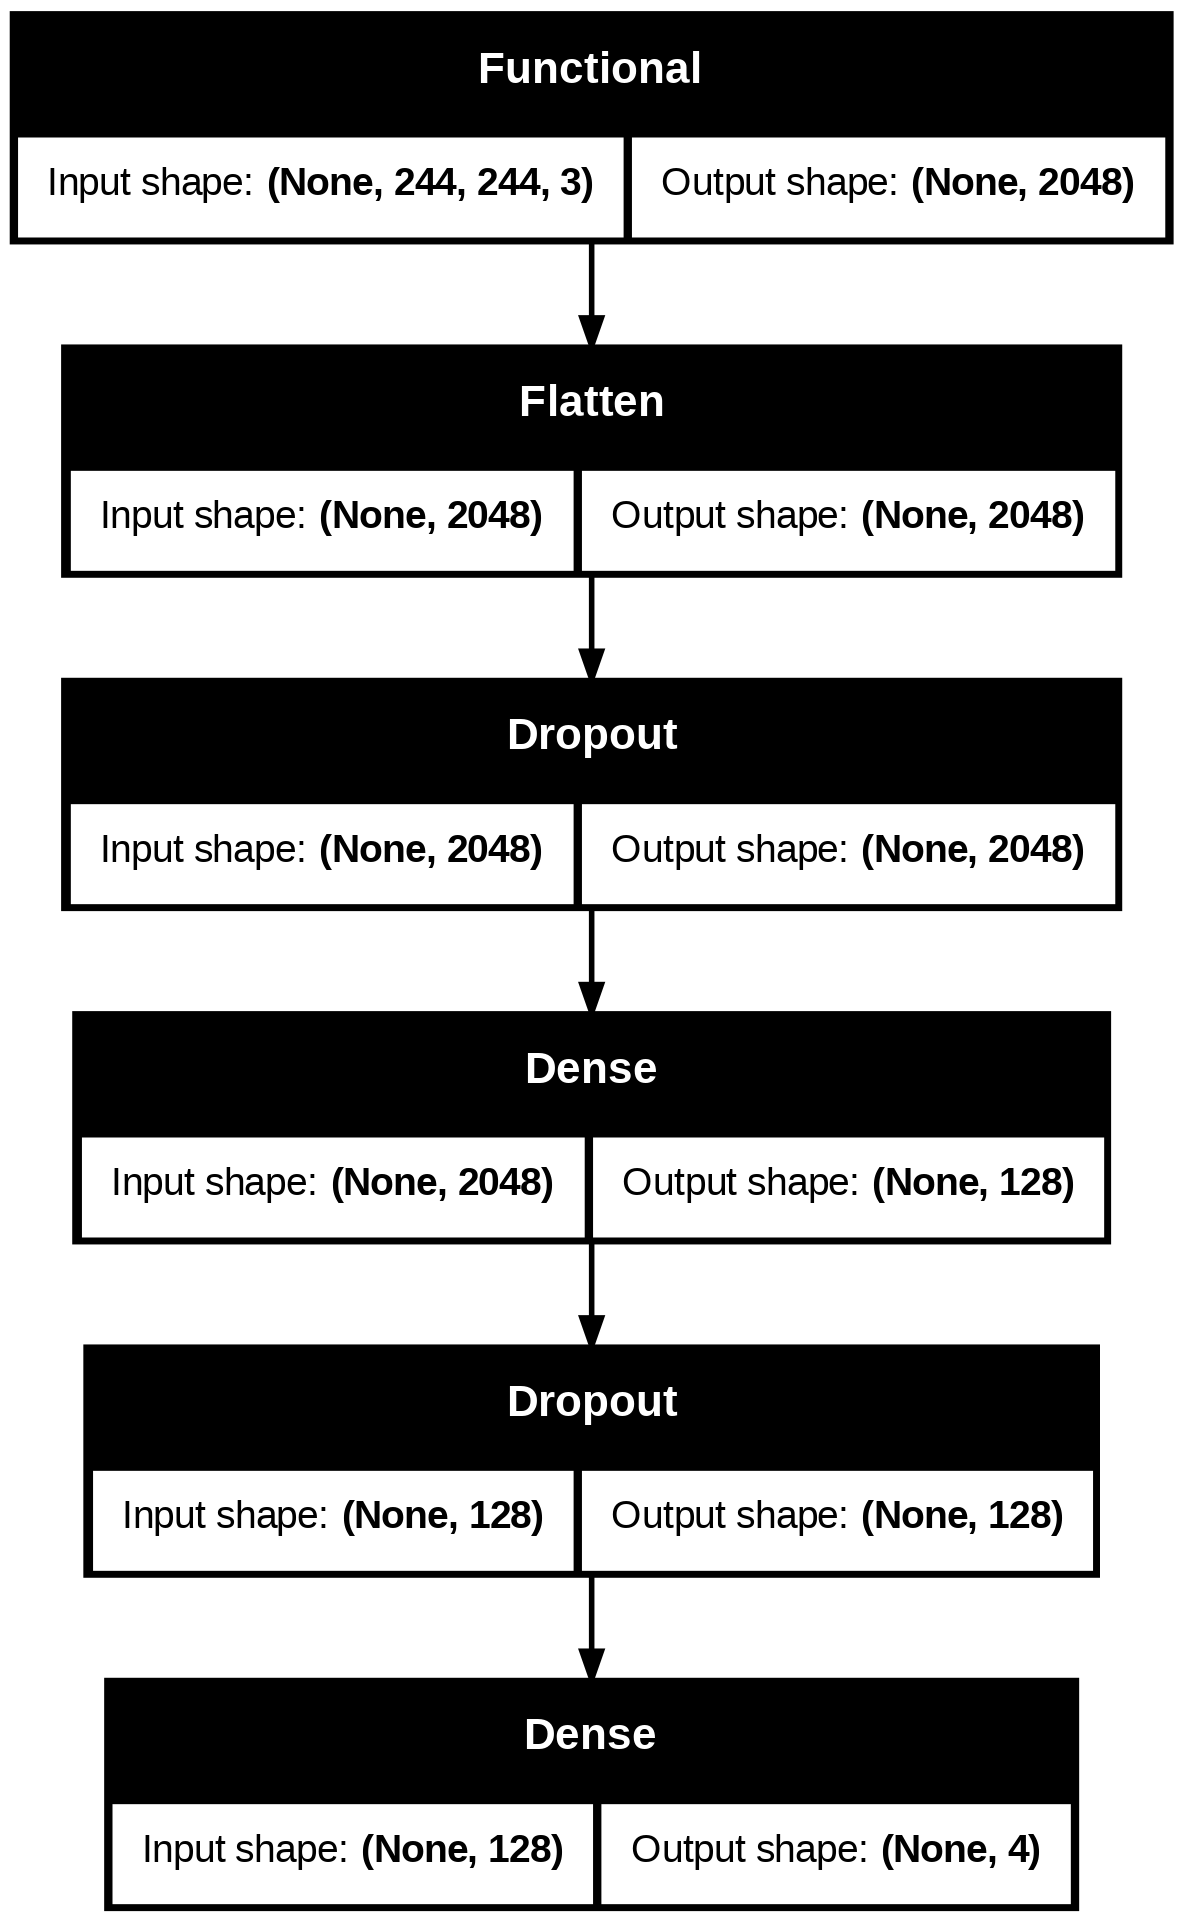

In [17]:
model.build(input_shape=(None, *img_shape))
tf.keras.utils.plot_model(model, show_shapes=True)

In [18]:
history = model.fit(train, epochs=10, validation_data=val, validation_freq=1)

Epoch 1/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 572s 597ms/step - accuracy: 0.5661 - loss: 0.9148 - val_accuracy: 0.9286 - val_loss: 0.1811
Epoch 2/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 488s 557ms/step - accuracy: 0.9681 - loss: 0.0897 - val_accuracy: 0.9500 - val_loss: 0.1423
Epoch 3/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 474s 557ms/step - accuracy: 0.9886 - loss: 0.0362 - val_accuracy: 0.9787 - val_loss: 0.0779
Epoch 4/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 473s 557ms/step - accuracy: 0.9935 - loss: 0.0222 - val_accuracy: 0.9840 - val_loss: 0.0494
Epoch 5/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 485s 570ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9909 - val_loss: 0.0264
Epoch 6/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 490s 556ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9595 - val_loss: 0.1890
Epoch 7/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 502s 556ms/step - accuracy: 0.9970 - loss: 0.0112 - val_accuracy: 0.9759 - val_loss: 0.0990
Epoch 8/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 502s 556ms/step - accuracy: 0.9970 -

In [19]:
model.evaluate(test, verbose=1)

319/319 ━━━━━━━━━━━━━━━━━━━━ 54s 170ms/step - accuracy: 0.9945 - loss: 0.0194


[0.01591576263308525, 0.9952922463417053]

In [ ]:
history1 = model.fit(train, epochs=1, validation_data=val, validation_freq=1)

In [ ]:
model.evaluate(test, verbose=1)

In [ ]:
model.save("Augmented_Alzheimer_Model_99.5.h5")

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

In [ ]:
plt.plot(history.history['accuracy'] + history1.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'] + history1.history['loss'])
plt.plot(history.history['val_loss'] + history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred2)

# Create a figure and plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set tick labels and axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [ ]:
# prompt: Make a fastapi application using this model

import uvicorn
from fastapi import FastAPI, File, UploadFile
from PIL import Image
import numpy as np
import tensorflow as tf
from io import BytesIO
from fastapi.middleware.cors import CORSMiddleware

# Load the model
model = tf.keras.models.load_model("Augmented_Alzheimer_Model_99.5.h5")

# Define class labels
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

app = FastAPI()

# Enable CORS
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Allows all origins
    allow_credentials=True,
    allow_methods=["*"],  # Allows all methods
    allow_headers=["*"],  # Allows all headers
)


@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    try:
        contents = await file.read()
        image = Image.open(BytesIO(contents))
        image = image.resize((244, 244))
        image_array = np.array(image) / 255.0  # Normalize pixel values
        image_array = np.expand_dims(image_array, axis=0)
        prediction = model.predict(image_array)
        predicted_class = np.argmax(prediction)
        predicted_label = class_labels[predicted_class]

        return {"predicted_label": predicted_label}
    except Exception as e:
        return {"error": str(e)}


if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)